 <center> <h1 style="color:blue; font-size:30px; line-height:1.5;"> Forecasting Analysis Process for the "Summer Habit" Store  </h1></center>


### Study Plan for "Summer Habit" Sales Forecasting Project

1. Introduction
2. Objectives
3. Research Questions
4. KPIs to Monitor
 - Stockout Rate
 - Inventory Turnover
 - Days of Inventory on Hand (DOH)
 - Return on Marketing Investment (ROMI)
 - Conversion Rate
 - Click-Through Rate (CTR)
 - Customer Retention Rate
 - Net Promoter Score (NPS)
 - Bounce Rate
 - Revenue Growth Rate
 - Profit Margin
 - Customer Satisfaction Score (CSAT)
 - Product Quality
5. Dataset Preparation
6. Methodology
 - Data Collection
 - Collect historical sales data and external factors.
 - Ensure data accuracy and completeness.
 - Data Cleaning and Preprocessing
 - Handle missing values and outliers.
 - Convert categorical variables to numerical formats where necessary.
 - Ensure no decimal values in the dataset.
 - Exploratory Data Analysis (EDA)
 - Create lag features, rolling statistics, holiday and event flags, and customer appreciation levels.
 - Model Development
 - Develop various forecasting models such as ARIMA, SARIMA, Prophet, and LSTM.
 - Train and validate models using historical data.
 - Model Evaluation
 - Evaluate models using metrics such as MAE, MSE, RMSE, and MAPE.
 - Select the best-performing model based on evaluation metrics.
 - Model Deployment
 - Deploy the selected model to predict future sales.
 - Integrate the model into a user-friendly interface for stakeholders.
 - Visualization and Reporting
 - Create interactive dashboards using Tableau or Power BI.
 - Visualize historical and forecasted sales data, seasonal patterns, and the impact of promotions and events.
 - Actionable Insights
 - Provide recommendations for inventory management, marketing strategies, and staffing plans based on forecasts.
 - Present findings and insights to the management team.
7. Expected Outcomes
 - Accurate sales forecasts for "Summer Habit."
 - Optimized inventory levels to prevent stockouts and overstocking.
 - Improved marketing effectiveness and customer engagement.
 - Enhanced operational efficiency and profitability.
 - Sustained competitive advantage through continuous monitoring of KPIs.
8. Tools and Technologies
 - Programming Languages: Python, PowerBI
 - Deployment: Flask/Django (for web applications), Heroku/AWS (for cloud deployment)
</p>

## Introduction 

### Why Sales Forecasting Matters

 <p style="line-height: 1.5; font-size: 18px;">
- Inventory Management: Accurate sales forecasts enable "Summer Habit" to maintain the right inventory levels. Overestimating sales can lead to excess stock, increased storage costs, and potential markdowns, while underestimating sales can result in stockouts and missed revenue opportunities.
 <p style="line-height: 1.5; font-size: 18px;">  
- Staffing Efficiency: Forecasting sales helps in planning staffing needs. Ensuring that stores are adequately staffed during peak periods improves customer service, reduces wait times, and enhances the overall shopping experience.
Targeted Marketing: Understanding anticipated sales trends allows the marketing team to design targeted campaigns that maximize customer engagement and drive sales. This includes planning promotions, discounts, and advertising efforts to coincide with peak demand periods.
    <p style="line-height: 1.5; font-size: 18px;">
- Resource Allocation: Sales forecasts provide valuable insights for strategic decision-making, enabling the management team to allocate resources effectively across different store locations and product categories.</p>

### Objective of the Study 
 <p style="line-height: 1.5; font-size: 18px;">
The objective of this sales forecasting study for "Summer Habit" is to develop and implement a robust forecasting model that will provide accurate and actionable sales predictions. These predictions aim to optimize various aspects of the business operations, including inventory management, staffing, marketing strategies, and customer engagement. By achieving high forecast accuracy and monitoring key performance indicators (KPIs), "Summer Habit" can enhance its overall operational efficiency, improve customer satisfaction, and drive business growth. Specifically, the objectives are as follows:</p>

 <p style="line-height: 1.5; font-size: 18px;">
  - Enhance Sales Performance: Increase total sales and achieve a positive sales growth rate.
Identify and leverage seasonal sales trends to maximize revenue during peak periods.</p>
 <p style="line-height: 1.5; font-size: 18px;">
  - Improve Customer Engagement and Satisfaction: Increase customer footfall and conversion rates by aligning staff schedules and inventory with predicted demand.Enhance average transaction value (ATV) through targeted promotions and product availability.
Monitor customer feedback scores and improve repeat purchase rates and Net Promoter Score (NPS).</p>
 <p style="line-height: 1.5; font-size: 18px;">
  - Optimize Inventory Management: Reduce stockout rates and ensure adequate inventory levels to meet customer demand.
Improve inventory turnover and decrease the days of inventory on hand (DOH).
Utilize forecasts to plan inventory purchases and reduce excess stock.</p>
<p style="line-height: 1.5; font-size: 18px;">
  - Boost Marketing Effectiveness: Increase promotion response rates by timing campaigns based on forecasted sales peaks.
Achieve a higher return on marketing investment (ROMI) by targeting the most effective marketing channels.
Reduce customer acquisition cost (CAC) by optimizing marketing spend.</p>
 <p style="line-height: 1.5; font-size: 18px;">
  - Enhance Operational Efficiency: Optimize staff utilization rates to ensure that stores are adequately staffed during peak times. Monitor labor cost as a percentage of sales to maintain operational cost-efficiency.
Minimize operational downtime caused by inventory shortages or other disruptions. </p>
<p style="line-height: 1.5; font-size: 18px;">
- Monitor and enhance competitive advantage through key performance indicators (KPIs).</p>



In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

# Set plot style
sns.set(style="whitegrid")


### Load the Dataset

In [2]:
# Define the file path
file_path = r"C:\Users\Owner\OneDrive\Desktop\retail_sales\Sales_Forcast.csv"

# Load the dataset
df = pd.read_csv(file_path)

# Display the first few rows of the dataframe
df.head()


,Date,Store_ID,Product_ID,Sales,Revenue,Customers,Marketing_Spend,Promotion,Holiday_Flag,Weekday,...,Visitors,Single_Page_Sessions,Total_Sessions,Survey_Responses,Promoters,Detractors,Customers_Start_Period,Customers_End_Period,Customer_Feedback,Return_Rates
0,1/1/2020,5,1005,23,1949,121,945,1,0,2,...,639,100,1845,78,72,17,1112,1420,Excellent,3
1,1/2/2020,1,1005,17,2372,100,925,0,1,3,...,1766,230,1933,125,28,17,1305,1974,Poor,3
2,1/3/2020,4,1012,19,2403,89,1074,0,1,4,...,1849,261,1920,123,76,32,1713,1517,Poor,8
3,1/4/2020,4,1012,20,2465,92,1040,0,0,5,...,1609,64,1072,179,62,29,1509,1143,Good,8
4,1/5/2020,4,1002,20,1643,106,930,0,0,6,...,1642,150,574,193,21,24,1233,1117,Good,8


In [21]:
# Step 2: Select the Most Valuable Variables
# Variables to keep based on KPIs:
selected_Variables = [
    'Date', 'Sales', 'Revenue', 'Customers', 'Marketing_Spend',
    'Promotion', 'Holiday_Flag', 'Weekday', 'Temperature', 'Unemployment_Rate',
    'Economic_Indicator', 'Stock_Level', 'Competitor_Price', 'Event_Flag', 'Region',
    'Customer_Appreciation', 'Stockouts', 'Demand', 'COGS', 'Clicks',
    'Conversions', 'Visitors', 'Single_Page_Sessions', 'Total_Sessions',
    'Promoters', 'Detractors', 'Return_Rates'
]

In [22]:
# Select the relevant columns
Df = df[selected_Variables]

Df.head()

,Date,Sales,Revenue,Customers,Marketing_Spend,Promotion,Holiday_Flag,Weekday,Temperature,Unemployment_Rate,...,Demand,COGS,Clicks,Conversions,Visitors,Single_Page_Sessions,Total_Sessions,Promoters,Detractors,Return_Rates
0,2020-01-01,23,1949,121,945,1,0,2,21,5,...,11,1363,363,45,639,100,1845,72,17,3
1,2020-01-02,17,2372,100,925,0,1,3,21,5,...,26,1689,297,21,1766,230,1933,28,17,3
2,2020-01-03,19,2403,89,1074,0,1,4,20,4,...,18,1625,243,38,1849,261,1920,76,32,8
3,2020-01-04,20,2465,92,1040,0,0,5,27,5,...,14,1385,209,52,1609,64,1072,62,29,8
4,2020-01-05,20,1643,106,930,0,0,6,26,5,...,21,1647,334,55,1642,150,574,21,24,8


 ### Data Cleaning

In [23]:
# Check for missing values
print(Df.isnull().sum())

# Fill missing values if any (example: forward fill)
Df.fillna(method='ffill', inplace=True)

# Display data types of columns
print(Df.dtypes)

# Convert date column to datetime if it's not already
Df['Date'] = pd.to_datetime(Df['Date'])


Date                     0
Sales                    0
Revenue                  0
Customers                0
Marketing_Spend          0
Promotion                0
Holiday_Flag             0
Weekday                  0
Temperature              0
Unemployment_Rate        0
Economic_Indicator       0
Stock_Level              0
Competitor_Price         0
Event_Flag               0
Region                   0
Customer_Appreciation    0
Stockouts                0
Demand                   0
COGS                     0
Clicks                   0
Conversions              0
Visitors                 0
Single_Page_Sessions     0
Total_Sessions           0
Promoters                0
Detractors               0
Return_Rates             0
dtype: int64
Date                     datetime64[ns]
Sales                             int64
Revenue                           int64
Customers                         int64
Marketing_Spend                   int64
Promotion                         int64
Holiday_Flag      

C:\Users\Owner\anaconda3\lib\site-packages\pandas\core\frame.py:4462: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().fillna(
<ipython-input-23-7aa3d0743721>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Df['Date'] = pd.to_datetime(Df['Date'])


In [27]:
# Remove outliers if necessary
# Example: Remove outliers from the 'Sales' column
q1 = Df['Sales'].quantile(0.25)
q3 = Df['Sales'].quantile(0.75)
iqr = q3 - q1
lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr
data = Df[(data['Sales'] >= lower_bound) & (Df['Sales'] <= upper_bound)]

### Exploratory Data Analysis (EDA)

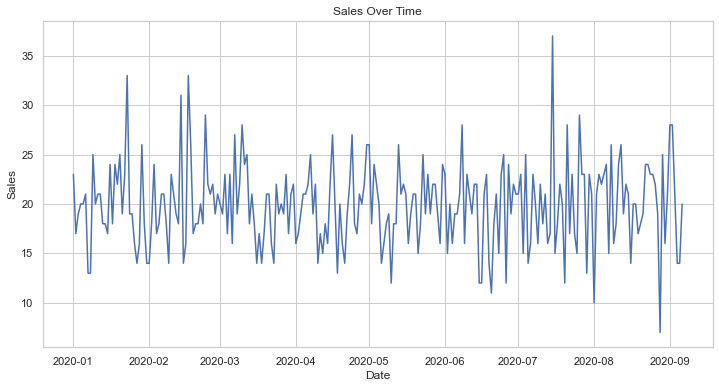

In [28]:
# Plot sales over time
plt.figure(figsize=(12, 6))
plt.plot(Df['Date'], df['Sales'])
plt.title('Sales Over Time')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.show()

### Observations
 <p style="line-height: 1.5; font-size: 18px;">
The above graph shows the sales over time. There are notable peaks around mid-January, late-February, early-April, mid-May, late-June, and early-August where sales spiked above 30.There are also notable drops where sales dipped below 10, particularly in early-May and mid-August.
</p>

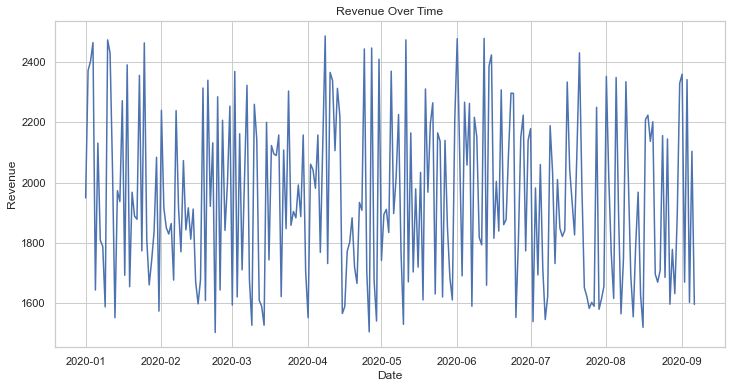

In [29]:
# Plot revenue over time
plt.figure(figsize=(12, 6))
plt.plot(Df['Date'], Df['Revenue'])
plt.title('Revenue Over Time')
plt.xlabel('Date')
plt.ylabel('Revenue')
plt.show()

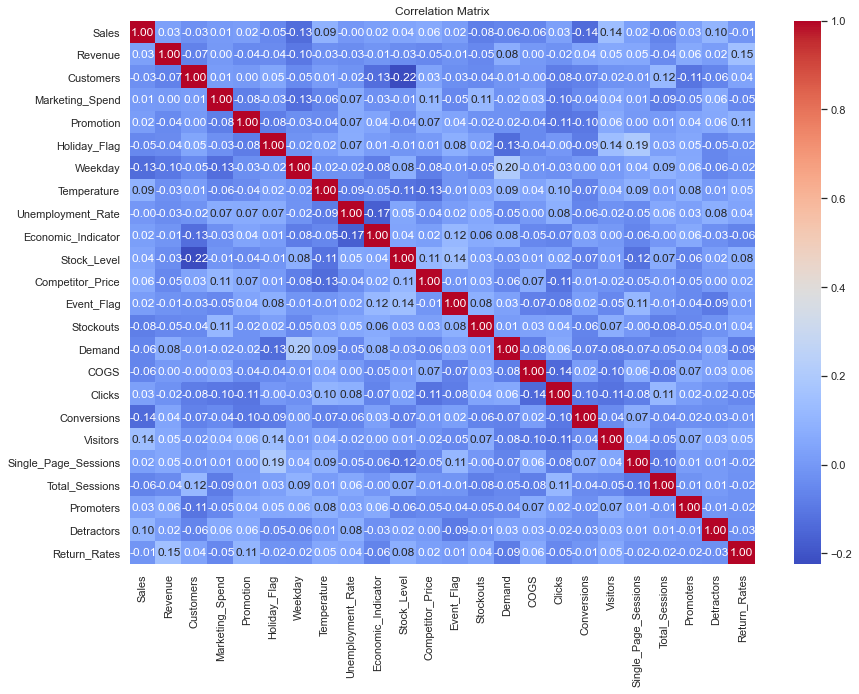

In [26]:
# Correlation heatmap
plt.figure(figsize=(14, 10))
sns.heatmap(Df.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Load the cleaned dataset
cleaned_file_path = r"C:\Users\Owner\OneDrive\Desktop\retail_sales\Sales_Forcast.csv"
data = pd.read_csv(cleaned_file_path)

In [4]:
# Step 1: Descriptive Statistics
print("Descriptive Statistics")
data.describe()

Descriptive Statistics


,Store_ID,Product_ID,Sales,Revenue,Customers,Marketing_Spend,Promotion,Holiday_Flag,Weekday,Temperature,...,Conversions,Visitors,Single_Page_Sessions,Total_Sessions,Survey_Responses,Promoters,Detractors,Customers_Start_Period,Customers_End_Period,Return_Rates
count,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,...,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000
mean,2.928000,1009.548000,19.884000,1943.676000,100.492000,1000.816000,0.292000,0.140000,3.020000,24.340000,...,50.768000,1308.616000,174.500000,1234.216000,126.596000,58.276000,29.800000,1488.492000,1494.656000,4.732000
std,1.415213,5.872789,4.252869,277.680241,9.580453,113.304288,0.455594,0.347683,1.998895,2.872176,...,25.305725,406.154881,72.808891,424.687215,43.878904,23.814878,11.392945,267.445062,289.921014,2.895117
min,1.000000,1000.000000,7.000000,1502.000000,71.000000,800.000000,0.000000,0.000000,0.000000,20.000000,...,10.000000,507.000000,50.000000,522.000000,52.000000,20.000000,10.000000,1001.000000,1000.000000,0.000000
25%,2.000000,1004.000000,17.000000,1690.500000,94.000000,907.000000,0.000000,0.000000,1.000000,22.000000,...,29.000000,982.500000,110.250000,868.750000,87.000000,36.250000,20.000000,1262.250000,1214.250000,2.000000
50%,3.000000,1009.000000,20.000000,1906.000000,100.000000,999.500000,0.000000,0.000000,3.000000,25.000000,...,47.000000,1302.500000,173.500000,1218.500000,127.000000,57.500000,30.500000,1499.000000,1502.000000,5.000000
75%,4.000000,1015.000000,22.000000,2164.250000,107.000000,1094.000000,1.000000,0.000000,5.000000,27.000000,...,70.000000,1674.750000,237.500000,1589.500000,167.000000,77.000000,39.000000,1680.500000,1757.500000,7.000000
max,5.000000,1019.000000,37.000000,2487.000000,127.000000,1198.000000,1.000000,1.000000,6.000000,29.000000,...,98.000000,1999.000000,299.000000,1997.000000,199.000000,99.000000,49.000000,1998.000000,1987.000000,9.000000


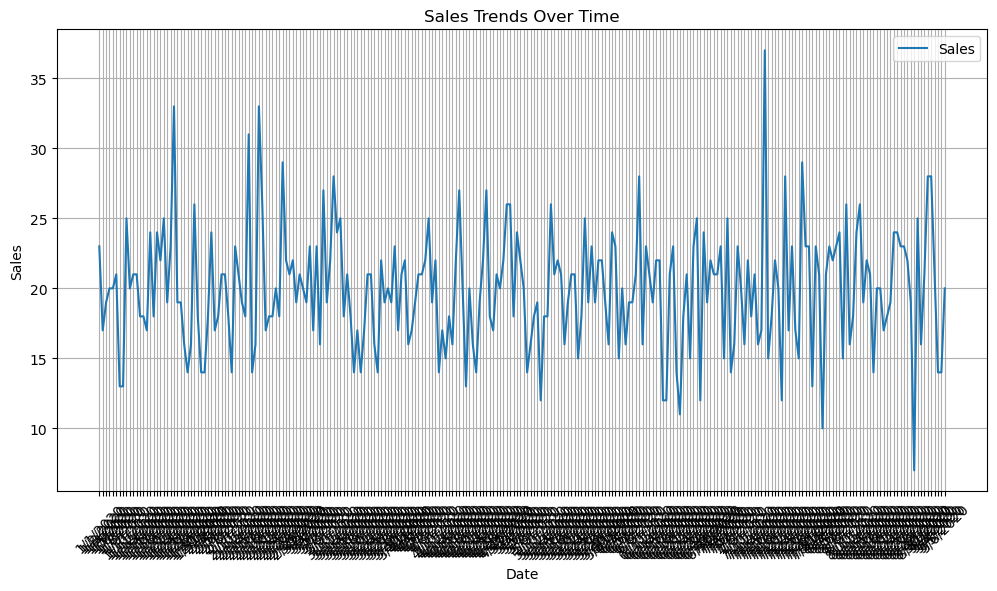

In [5]:
# Step 2: Visualize Sales Trends over Time
plt.figure(figsize=(12, 6))
plt.plot(data['Date'], data['Sales'], label='Sales')
plt.title('Sales Trends Over Time')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.xticks(rotation=45)
plt.grid(True)
plt.legend()
plt.show()

> The line chart shows the sales trends over time with noticeable fluctuations. Sales vary between approximately 10 and 35 units, with frequent peaks and dips, indicating inconsistent demand. There are a few sharp spikes in sales, suggesting periodic increases in customer activity or specific events. Despite these spikes, there is no clear upward or downward trend, indicating that sales remain fairly volatile and unpredictable throughout the observed period. This suggests that external factors or events could be influencing these irregular sales patterns

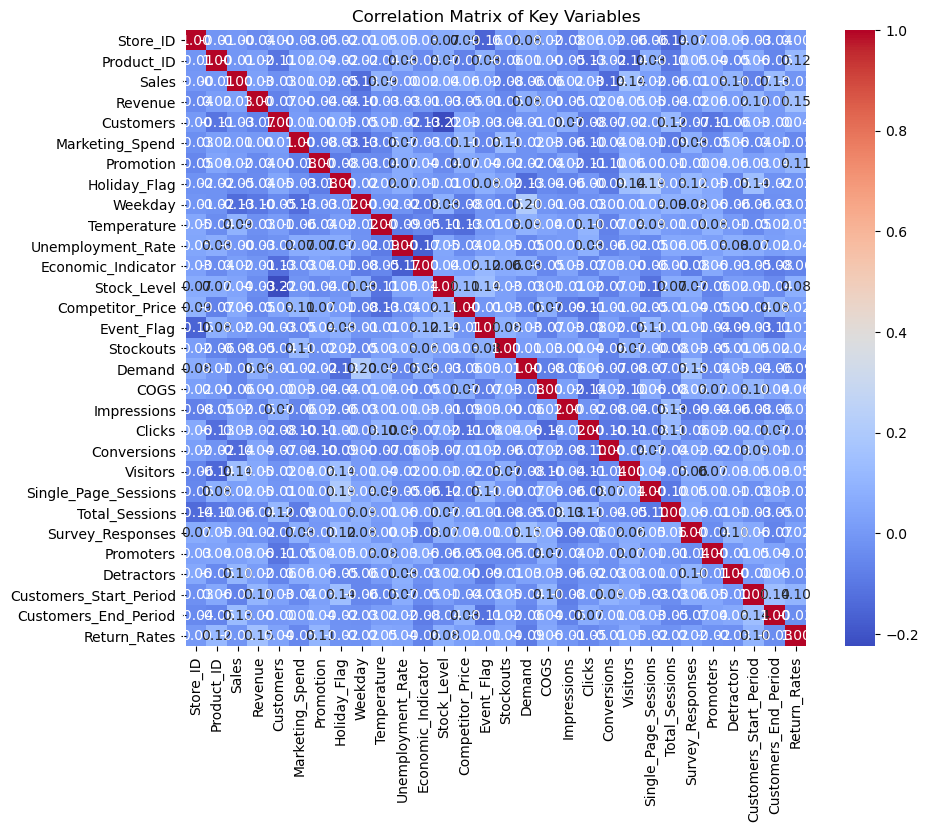

In [6]:
# Step 3: Correlation Analysis
plt.figure(figsize=(10, 8))
corr_matrix = data.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix of Key Variables')
plt.show()

In [7]:
# Step 4: Seasonal Analysis (Month-wise analysis of sales)
# Convert Date column to datetime if it's not already
data['Date'] = pd.to_datetime(data['Date'])
data['Month'] = data['Date'].dt.month

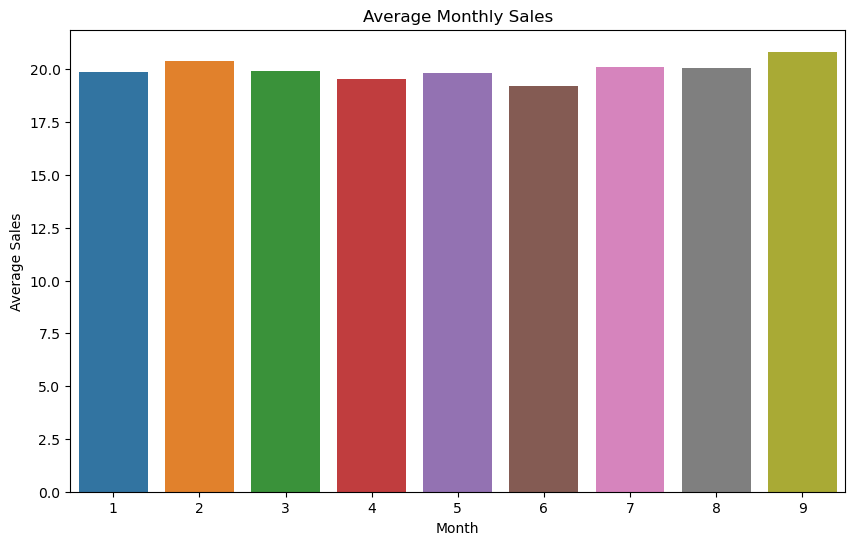

In [8]:
# Plot sales by month to observe any seasonal patterns
monthly_sales = data.groupby('Month')['Sales'].mean()
plt.figure(figsize=(10, 6))
sns.barplot(x=monthly_sales.index, y=monthly_sales.values)
plt.title('Average Monthly Sales')
plt.xlabel('Month')
plt.ylabel('Average Sales')
plt.show()

> The bar chart illustrates the average monthly sales across different months. Sales are relatively consistent throughout the year, with minor fluctuations between months. The sales peak slightly in January, February, and September, while the lowest averages are observed in June. The uniformity across most months suggests that sales remain steady, without significant seasonality or sharp changes between months. This implies that "Summer Habit" may experience stable demand year-round, with only slight increases during some months.

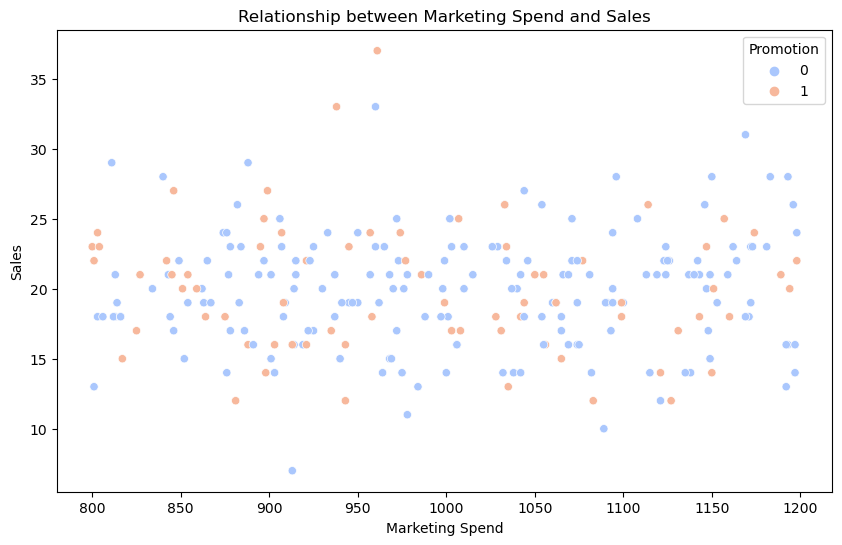

In [9]:
# Step 5: Relationship between Marketing Spend and Sales
plt.figure(figsize=(10, 6))
sns.scatterplot(data=data, x='Marketing_Spend', y='Sales', hue='Promotion', palette='coolwarm')
plt.title('Relationship between Marketing Spend and Sales')
plt.xlabel('Marketing Spend')
plt.ylabel('Sales')
plt.show()

> The scatter plot shows the relationship between marketing spend and sales, with data points categorized by whether a promotion was active (orange = promotion, blue = no promotion). There is no clear linear relationship between marketing spend and sales, as the sales values appear to be spread across different levels of marketing spend. This suggests that simply increasing marketing spend may not directly lead to higher sales. Additionally, the presence of promotions (orange dots) doesn't consistently lead to significantly higher sales compared to when promotions are absent (blue dots), indicating that other factors may also influence sales performance.

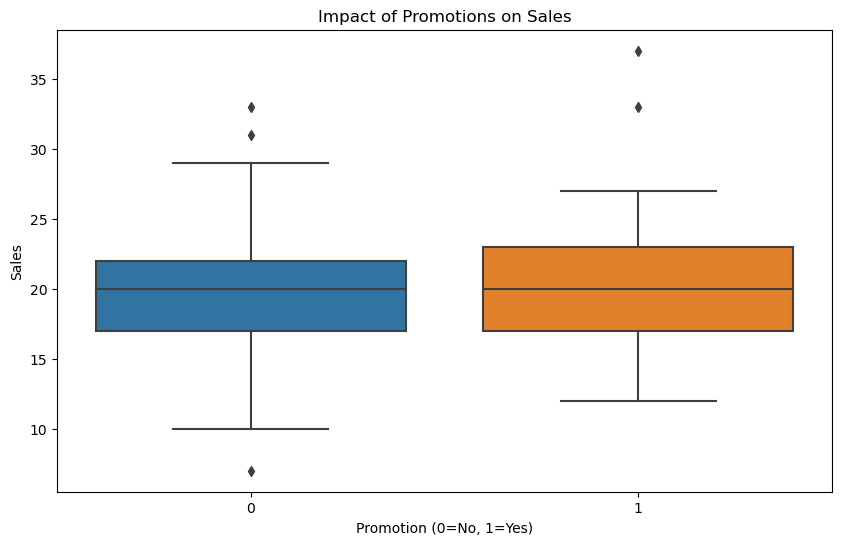

In [10]:
# Step 6: Effect of Promotions and Events on Sales
plt.figure(figsize=(10, 6))
sns.boxplot(x='Promotion', y='Sales', data=data)
plt.title('Impact of Promotions on Sales')
plt.xlabel('Promotion (0=No, 1=Yes)')
plt.ylabel('Sales')
plt.show()


> The boxplot compares the impact of promotions on sales. The blue box represents periods with no promotions, while the orange box represents periods with promotions. Both distributions appear fairly similar, with the median sales being only slightly higher during promotions. The spread of sales is also comparable, though there are a few higher outliers during both promotional and non-promotional periods. This suggests that promotions do not significantly impact overall sales performance, as there is only a slight increase in sales during promotions. Other factors may be contributing to sales variability, making promotions less influential in this dataset.

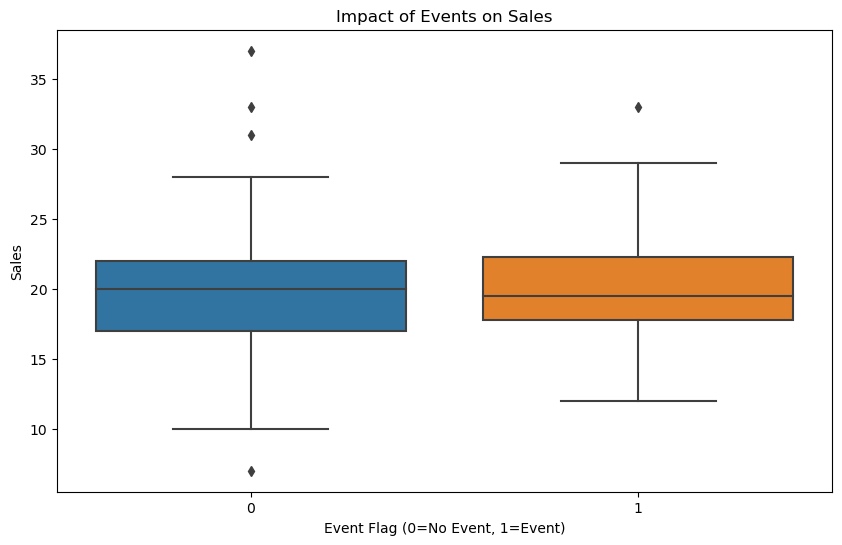

In [11]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Event_Flag', y='Sales', data=data)
plt.title('Impact of Events on Sales')
plt.xlabel('Event Flag (0=No Event, 1=Event)')
plt.ylabel('Sales')
plt.show()

> The boxplot compares the impact of events on sales. The blue box represents periods without events, and the orange box represents periods with events. The median sales during event periods are slightly lower compared to non-event periods, and there is less spread in the sales data during events. Additionally, there are fewer outliers during event periods. This suggests that events may not significantly boost sales in this dataset and may even result in slightly lower sales compared to non-event periods. It indicates that holding events might not have the desired positive effect on increasing sales.

In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [13]:
# Load the cleaned dataset
cleaned_file_path = r"C:\Users\Owner\OneDrive\Desktop\retail_sales\Sales_Forcast.csv"
data = pd.read_csv(cleaned_file_path)

In [14]:
# Convert the 'Date' column to datetime
data['Date'] = pd.to_datetime(data['Date'])

In [15]:
# Step 1: Check for Stationarity
# We will use the Augmented Dickey-Fuller test
sales_data = data['Sales']
result = adfuller(sales_data)
print(f'ADF Statistic: {result[0]}')
print(f'p-value: {result[1]}')

ADF Statistic: -16.07844680941274
p-value: 5.411059997007223e-29


In [16]:
# If p-value > 0.05, the data is non-stationary, and we may need to apply differencing
if result[1] > 0.05:
    sales_data_diff = sales_data.diff().dropna()
    plt.figure(figsize=(10, 6))
    plt.plot(sales_data_diff)
    plt.title("Differenced Sales Data (1st Order)")
    plt.show()
else:
    sales_data_diff = sales_data

<Figure size 1200x600 with 0 Axes>

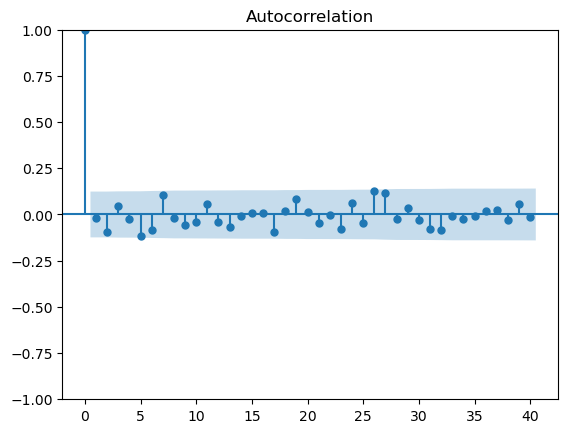

<Figure size 1200x600 with 0 Axes>

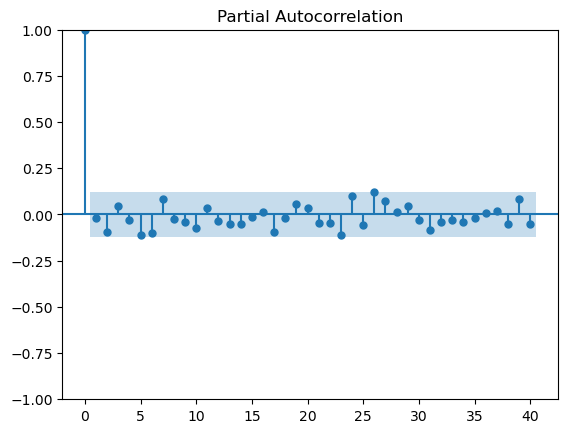

In [17]:
# Step 2: Plot ACF and PACF to determine the order of ARIMA
plt.figure(figsize=(12, 6))
plot_acf(sales_data_diff, lags=40)
plt.show()

plt.figure(figsize=(12, 6))
plot_pacf(sales_data_diff, lags=40)
plt.show()

> The autocorrelation plot (ACF) shows how the sales data is correlated with its own previous values (lags). The spike at lag 0 represents perfect correlation with itself, as expected. Beyond lag 0, the autocorrelations quickly drop and remain within the confidence interval (shaded blue region), indicating no significant autocorrelation at other lags. This suggests that the sales data does not have a strong autocorrelation structure, implying that the data may be fairly random without clear patterns or trends that persist over time. Based on this, a simple ARIMA model with minimal AR (Auto-Regressive) or MA (Moving Average) components might be appropriate.

In [18]:
# Step 3: Build the ARIMA model
# Based on the ACF and PACF plots, determine the p, d, q values
# p = order of AR component, d = order of differencing, q = order of MA component
p, d, q = 2, 1, 2  # These are just placeholders, modify based on ACF/PACF plots
model = ARIMA(sales_data, order=(p, d, q))
model_fit = model.fit()

In [19]:
# Step 4: Make Predictions
# Forecast the next 30 days
forecast = model_fit.forecast(steps=30)
print("Forecasted Sales for the Next 30 Days")
print(forecast)

Forecasted Sales for the Next 30 Days
250    20.226406
251    19.722652
252    19.921150
253    19.885086
254    19.880761
255    19.886330
256    19.884321
257    19.884638
258    19.884703
259    19.884642
260    19.884662
261    19.884659
262    19.884659
263    19.884659
264    19.884659
265    19.884659
266    19.884659
267    19.884659
268    19.884659
269    19.884659
270    19.884659
271    19.884659
272    19.884659
273    19.884659
274    19.884659
275    19.884659
276    19.884659
277    19.884659
278    19.884659
279    19.884659
Name: predicted_mean, dtype: float64


> The displayed output shows the forecasted sales for the next 30 days. The forecast starts at 20.2264 on day 250 and gradually stabilizes around 19.8846 from day 260 onward. This indicates that the model predicts a relatively stable sales figure, with only slight fluctuations at the beginning. The consistency in the later days suggests that the model expects sales to remain nearly constant over the forecasted period. This flat prediction might suggest that the model is not capturing potential seasonal or external effects, which could be due to the lack of significant trends or seasonality in the data. Further model refinement might be needed to account for more dynamic sales patterns, if they exist.

In [20]:
# Step 5: Evaluate the Model
# Split the data into train and test sets
train_size = int(len(sales_data) * 0.8)
train_data, test_data = sales_data[:train_size], sales_data[train_size:]

In [21]:
# Fit the model on the training data
model_train = ARIMA(train_data, order=(p, d, q))
model_train_fit = model_train.fit()

In [22]:
# Forecast for the test period
forecast_test = model_train_fit.forecast(steps=len(test_data))

In [23]:
# Calculate evaluation metrics
mae = mean_absolute_error(test_data, forecast_test)
mse = mean_squared_error(test_data, forecast_test)
rmse = np.sqrt(mse)
print(f'MAE: {mae}, MSE: {mse}, RMSE: {rmse}')

MAE: 3.911808561582559, MSE: 23.12575972666871, RMSE: 4.808925007386652


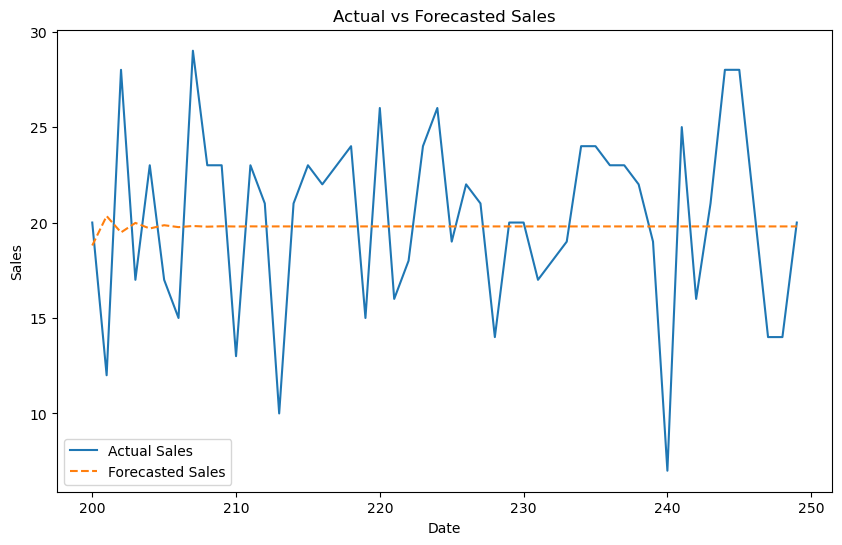

In [24]:
# Plot actual vs forecasted values
plt.figure(figsize=(10, 6))
plt.plot(test_data.index, test_data, label='Actual Sales')
plt.plot(test_data.index, forecast_test, label='Forecasted Sales', linestyle='--')
plt.title('Actual vs Forecasted Sales')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.legend()
plt.show()

> The line plot compares actual sales (solid blue line) with forecasted sales (dashed orange line). The actual sales fluctuate significantly over time, showing variability and volatility. In contrast, the forecasted sales remain relatively flat and stable around the value of 20, as indicated by the dashed orange line.

> This suggests that the forecasting model is not effectively capturing the dynamic nature of the actual sales. The flatness of the forecasted sales indicates that the model might be underfitting, possibly due to a lack of complexity in accounting for the variability in the data or missing key features like seasonality or external factors. Further model refinement (e.g., introducing seasonality through SARIMA or adding external factors) may be necessary to improve forecast accuracy.

In [25]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

# Load the cleaned dataset
cleaned_file_path = r"C:\Users\Owner\OneDrive\Desktop\retail_sales\Sales_Forcast.csv"
data = pd.read_csv(cleaned_file_path)

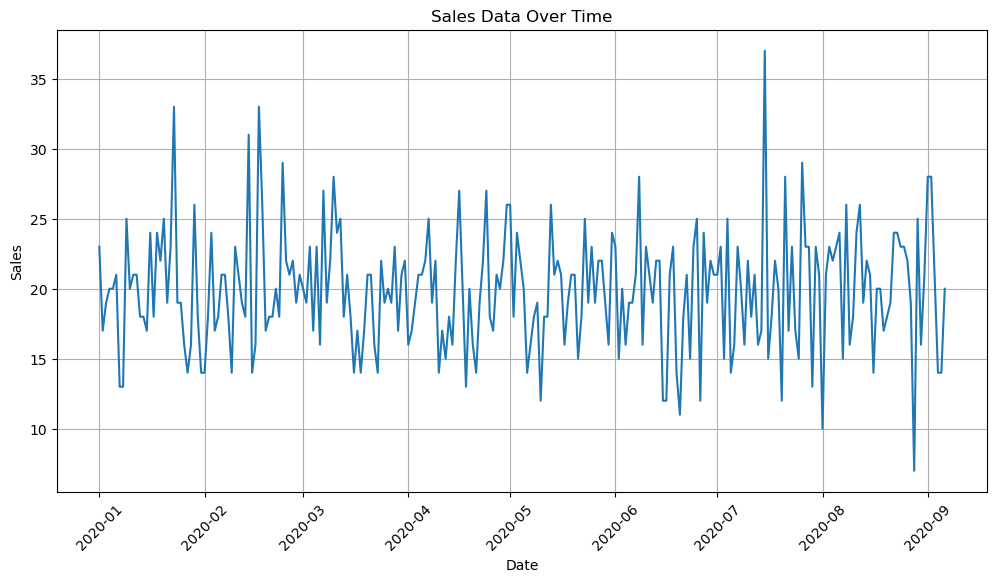

In [26]:
# Convert the 'Date' column to datetime
data['Date'] = pd.to_datetime(data['Date'])

# Step 1: Visualize the sales data to check for seasonality
plt.figure(figsize=(12, 6))
plt.plot(data['Date'], data['Sales'], label='Sales')
plt.title('Sales Data Over Time')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.grid(True)
plt.xticks(rotation=45)
plt.show()

> This line plot represents sales data over time from January 2020 to September 2020. The data shows noticeable fluctuations in sales, with values ranging between approximately 10 and 35. There is no clear long-term trend (either upward or downward) during this period, but there are several peaks and dips scattered throughout. This indicates that sales are volatile and may be influenced by external factors such as promotions, events, or seasonal trends. While there are some repeated patterns, they do not indicate strong seasonality. More advanced modeling may be needed to uncover underlying factors driving this variability in sales.

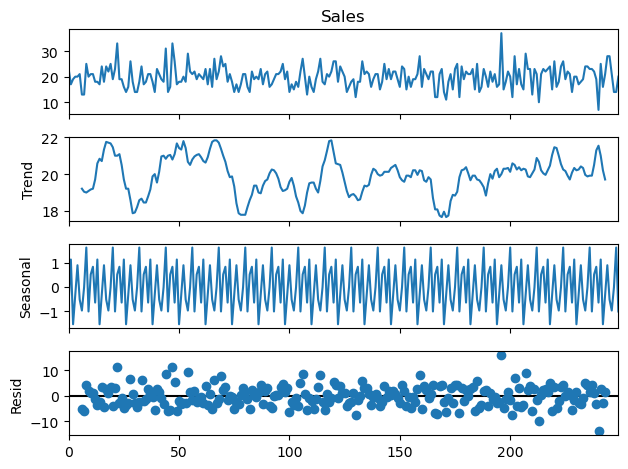

In [27]:
# Step 2: Perform Seasonal Decomposition
# Decompose the time series to observe trend, seasonality, and residuals
decomposition = seasonal_decompose(data['Sales'], model='additive', period=12)
fig = decomposition.plot()
plt.show()

This figure shows the seasonal decomposition of the sales data into four components:
> 1) Sales: The original sales data, which displays fluctuating values over time.
> 2) Trend: The underlying trend component of the data, shows a slow-moving pattern in sales. There are some upward and downward movements, but overall, it suggests periods of growth and decline without a strong long-term trend.
> 3) Seasonal: The seasonal component, which captures regular repeating patterns. It oscillates consistently around zero, indicating a periodic fluctuation in sales, likely corresponding to weekly or monthly cycles.
> 4) Residual (Resid): The residuals represent the part of the sales data that cannot be explained by the trend or seasonal components. The residuals appear fairly random, with no obvious patterns, which suggests that the decomposition has captured the primary systematic variations in the data.

In [ ]:
# Step 3: Build SARIMA Model
# Define the SARIMA model based on identified seasonal patterns
# p, d, q = parameters for the ARIMA component
# P, D, Q, s = parameters for the seasonal component (s=12 for monthly data)
p, d, q = 2, 1, 2  # Modify based on the ACF/PACF plot or previous ARIMA test
P, D, Q, s = 1, 1, 1, 12  # Modify these based on observed seasonality

model = SARIMAX(data['Sales'], order=(p, d, q), seasonal_order=(P, D, Q, s))
sarima_model = model.fit()

In [29]:
# Step 4: Forecast Future Sales
# Forecast for the next 30 days
forecast_sarima = sarima_model.get_forecast(steps=30)
forecast_values = forecast_sarima.predicted_mean
forecast_ci = forecast_sarima.conf_int()

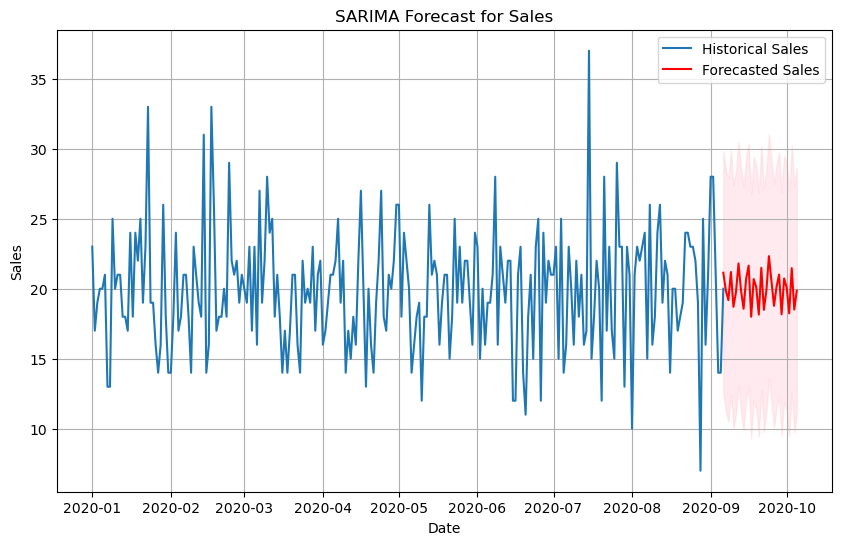

In [30]:
# Plot forecasted sales
plt.figure(figsize=(10, 6))
plt.plot(data['Date'], data['Sales'], label='Historical Sales')
plt.plot(pd.date_range(start=data['Date'].max(), periods=30, freq='D'), forecast_values, label='Forecasted Sales', color='red')
plt.fill_between(pd.date_range(start=data['Date'].max(), periods=30, freq='D'), 
                 forecast_ci.iloc[:, 0], forecast_ci.iloc[:, 1], color='pink', alpha=0.3)
plt.title('SARIMA Forecast for Sales')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.legend()
plt.grid(True)
plt.show()

> The plot shows the SARIMA forecast for sales over time, with historical sales represented by the blue line and forecasted sales shown in red. The historical data exhibits high variability, with frequent fluctuations and no strong trends. The forecasted sales, however, are much smoother and remain relatively stable, hovering around the same value with minimal fluctuation. The red shaded area around the forecasted sales represents the confidence interval, which widens slightly as time progresses, indicating increasing uncertainty in the forecast.

> Overall, the SARIMA model predicts a consistent sales pattern in the future but fails to capture the same level of volatility observed in the historical sales. This could imply that the model might not fully account for the more erratic fluctuations in sales, likely due to unmodeled external factors or randomness in the historical data. Further refinement or the inclusion of additional variables may improve the model's ability to predict these variations.

In [31]:
# Step 5: Evaluate the SARIMA Model
# Split the data into train and test sets
train_size = int(len(data['Sales']) * 0.8)
train_data, test_data = data['Sales'][:train_size], data['Sales'][train_size:]

In [ ]:
# Fit the SARIMA model on the training data
model_train = SARIMAX(train_data, order=(p, d, q), seasonal_order=(P, D, Q, s))
sarima_model_train = model_train.fit()

In [33]:
# Forecast on the test period
forecast_test_sarima = sarima_model_train.get_forecast(steps=len(test_data))
forecast_test_values = forecast_test_sarima.predicted_mean

In [34]:
# Calculate evaluation metrics
mae_sarima = mean_absolute_error(test_data, forecast_test_values)
mse_sarima = mean_squared_error(test_data, forecast_test_values)
rmse_sarima = np.sqrt(mse_sarima)

SARIMA MAE: 3.9326416810878224, MSE: 22.410510272574143, RMSE: 4.7339740464618245


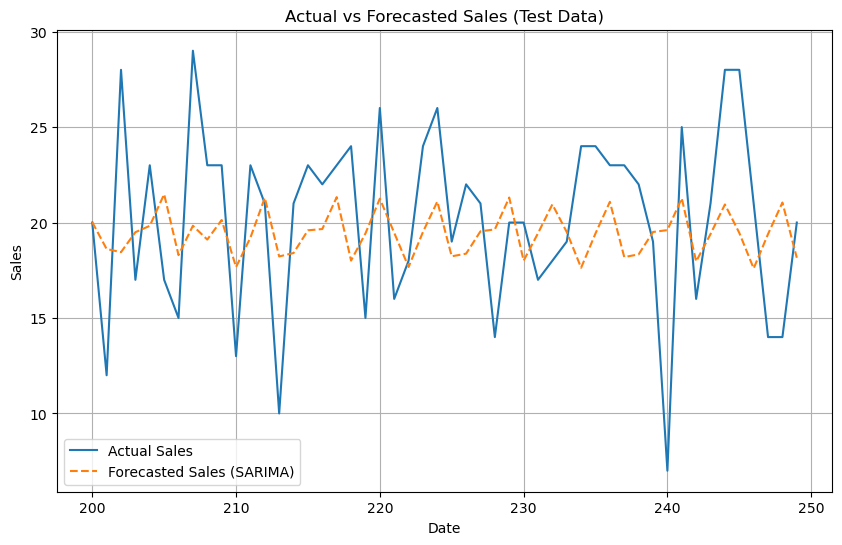

In [35]:
print(f'SARIMA MAE: {mae_sarima}, MSE: {mse_sarima}, RMSE: {rmse_sarima}')

# Plot the actual vs forecasted sales during the test period
plt.figure(figsize=(10, 6))
plt.plot(test_data.index, test_data, label='Actual Sales')
plt.plot(test_data.index, forecast_test_values, label='Forecasted Sales (SARIMA)', linestyle='--')
plt.title('Actual vs Forecasted Sales (Test Data)')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.legend()
plt.grid(True)
plt.show()

> This plot shows the actual sales (blue solid line) versus the forecasted sales using SARIMA (orange dashed line) for the test data. The actual sales demonstrate high variability, with sharp peaks and troughs, reflecting significant fluctuations in sales over time. In contrast, the SARIMA model's forecasted sales remain relatively smooth and fail to capture the full extent of the volatility seen in the actual data.

> While the SARIMA forecast roughly follows the general trend of the actual sales, it doesn't adequately predict the more extreme changes in sales levels. The model performs well in predicting the average behavior but struggles with the unpredictability of individual sales spikes and drops. This suggests that the SARIMA model may need further tuning or the inclusion of additional variables to better capture the full range of sales patterns.